### 필수과제 
- 영화데이터의 평점을 예측하는 KNN 회귀 모델링 진행하기

In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mov = pd.read_csv("basic_movie.tsv", delimiter="\t")

In [3]:
mov

,tconst,averageRating,numVotes
0,tt0000001,5.7,1972
1,tt0000002,5.8,263
2,tt0000003,6.5,1819
3,tt0000004,5.6,178
4,tt0000005,6.2,2614
...,...,...,...
1311563,tt9916730,8.3,10
1311564,tt9916766,7.0,21
1311565,tt9916778,7.2,36
1311566,tt9916840,7.5,7


In [4]:
data = mov.drop(["tconst","averageRating"], axis=1) # 문자형 컬럼은 분석에서 제외
target = mov["averageRating"]

In [5]:
data

,numVotes
0,1972
1,263
2,1819
3,178
4,2614
...,...
1311563,10
1311564,21
1311565,36
1311566,7


In [6]:
target

0          5.7
1          5.8
2          6.5
3          5.6
4          6.2
          ... 
1311563    8.3
1311564    7.0
1311565    7.2
1311566    7.5
1311567    7.0
Name: averageRating, Length: 1311568, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

In [8]:
X_train

,numVotes
122440,16
1198419,11
889644,28
1166038,231
1061750,28
...,...
870880,399
1181707,123
733210,43
404040,14


In [9]:
y_train

122440     5.2
1198419    5.2
889644     7.6
1166038    7.4
1061750    7.2
          ... 
870880     4.4
1181707    7.0
733210     8.0
404040     8.0
436831     6.3
Name: averageRating, Length: 983676, dtype: float64

### KNN회귀 알고리즘으로 RMSE 구해보기

In [10]:
# rmse값 구하기 (default, K=1~10)
rmse_val = []
for K in range(10):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)
print('가장최소 rmse',min(rmse_val))

RMSE value k 1 = 1.8523736989453747
RMSE value k 2 = 1.6144680774464322
RMSE value k 3 = 1.5963245418826566
RMSE value k 4 = 1.5631922020837161
RMSE value k 5 = 1.519698162134579
RMSE value k 6 = 1.4940778968770396
RMSE value k 7 = 1.4704435813265293
RMSE value k 8 = 1.4627792006872258
RMSE value k 9 = 1.4550702152242248
RMSE value k 10 = 1.4566890417833553
가장최소 rmse 1.4550702152242248


In [11]:
# rmse값 구하기 (default, K=11~20)
rmse_val = []
for K in range(10,20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)
print('가장최소 rmse',min(rmse_val))

RMSE value k 11 = 1.4441515724848353
RMSE value k 12 = 1.4429167215350487
RMSE value k 13 = 1.437116435629495
RMSE value k 14 = 1.437177494676663
RMSE value k 15 = 1.4322465789610592
RMSE value k 16 = 1.4298022613228174
RMSE value k 17 = 1.42465249318509
RMSE value k 18 = 1.4192999034188594
RMSE value k 19 = 1.4121095049564916
RMSE value k 20 = 1.4136518878468818
가장최소 rmse 1.4121095049564916


- K=19의 RMSE가 가장 작은 것으로 나타났다.

In [13]:
# K=5 일 때 예측값과 정답 비교
model_5 = KNeighborsRegressor(n_neighbors = 5)

In [14]:
model_5.fit(X_train, y_train)

KNeighborsRegressor()

In [15]:
pred = model_5.predict(X_test)

In [33]:
comp = pd.DataFrame({"y":y_test, "pred":pred})
comp

,y,pred
1271608,7.8,7.16
387156,8.5,6.28
1281251,8.8,7.20
243167,6.9,5.80
33409,7.2,6.30
...,...,...
432950,8.2,7.66
758679,8.8,6.96
855387,5.1,7.16
980046,8.1,6.44


[]

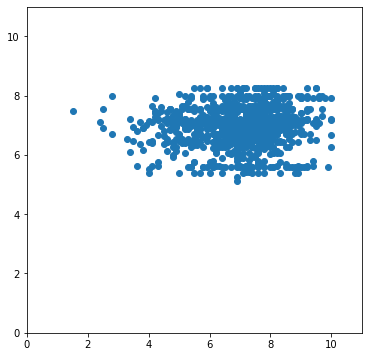

In [46]:
plt.figure(figsize=(6,6))
plt.scatter(x=comp.y.head(1000), y=comp.pred.head(1000))
plt.xlim(0,11)
plt.ylim(0,11)
plt.plot()

In [47]:
comp.describe()

,y,pred
count,327892.000000,327892.000000
mean,6.950811,6.949314
std,1.385577,0.662260
min,1.000000,4.140000
25%,6.200000,6.520000
50%,7.100000,7.020000
75%,7.900000,7.380000
max,10.000000,8.980000


- 실제 정답값은 1 ~ 10 사이의 값을 갖지만, 예측값은 더 적은 범위의 값들을 갖는다(4 ~ 9).
- 평균과 중앙값은 거의 같게 나온다
- 실제 값이 낮은 평점은 높게, 높은 평점은 낮게 추정되었다.